# Simple Regression with Gradient Descent from Scratch

### Contents: 
1. Visualizing the Dataset
2. Defining the Hyperparameters
3. Training the Model

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
sns.set()
from sklearn import datasets
import matplotlib.pyplot as plt

----
## 1. Visualizing the Dataset
I'll make a randomly generated set of points that trend along a line and try to fit that line with gradient descent. 

(150, 2)

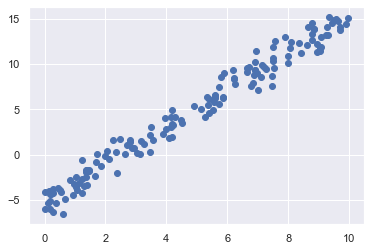

In [2]:
rng = np.random.RandomState(1)
# create x random x values
# creates an array of given shape (150) with standard uniform distribution
x = 10 * rng.rand(150) 
y = 2 * x - 5 + rng.randn(150)
plt.scatter(x, y)
x = np.array(x).reshape(len(x), 1)
y = np.array(y).reshape(len(y), 1)
points = np.hstack([x, y])
points.shape

----
## 2. Defining the Hyperparameters

#### 2.1 Learning rate and Convergence
We're going to have a bunch of hyperparameters for gradient descent. One we'll use is the **learning rate**.
* Learning rate : describes how fast the model converges.
* Convergence: when the model becomes optimal

Convergence, in this case, refers to reaching the line of best fit. You might be wondering, "Shouldn't the learning rate just be super high so that the model can converge faster?" No, there's a tradeoff faced for almost all hyper-parameters. If the learning rate is too small, we'll get slow convergence, but if the learning rate is too high, then the error function might not decrease and  we won't see convergence at all.

#### 2.2 Initial values
The next two hyperparameters we'll use are the initial b, `b_init`, and initial m, `m_init`. These refer to initial values for the parameters in $y=mx+b$. We'll also need to specify the number of iterations, `n_iters`.



## 3. Training the Model
Training the model involves finding the line that minimizes error.

$ \text{Total Error}  = \dfrac{1}{N}\sum\limits_{i=1}^{N}((y_i - \hat{y}_i))^2 $


In [3]:
def compute_error(b, m, points):
    # initialize error
    E_tot = 0
    N = len(points)
    # for every point
    for i in range(0, N):
        # get the x value
        x = points[i, 0]
        # get the y value
        y = points[i, 1]
        # calculate square difference for the error and add it to E_tot
        y_hat = m * x + b
        E_tot += (y - yhat) ** 2
    # return it normalized
    return E_tot / float(N)

What is gradient descent?

In [4]:
def gradient_descent(points, b_in, m_in, lrate, n_iters):
    # input b and m into the function
    b = b_in
    m = m_in
    
    # gradient descent
    for i in range(n_iters):
        # update b and m with a more accurate b and m
        # this is a gradient step
        b, m = gradient_step(b, m, points, lrate)
    return b, m

$ \dfrac{\partial }{\partial m} E_{tot} = \dfrac{2}{N} \sum\limits_{i=1}^N -x_i (y_i-\hat{y}_i) $

$ \dfrac{\partial}{\partial b} E_{tot} = \dfrac{2}{N} \sum\limits_{i=1}^N - (y_i-\hat{y}_i) $

In [5]:
def gradient_step(b_current, m_current, points, lrate):
    # initalize gradients
    b_gradient = 0
    m_gradient = 0
    
    # When the error is the smallest, that gives us convergence
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        # compute partial derivatives for error function
        y_hat = m_current * x + b_current
        m_gradient += -(2/N) * x *(y - y_hat)
        b_gradient += -(2/N) * (y - y_hat)
    
    # update b and m values using the partial derivatives
    m_new = m_current - (lrate * m_gradient)
    b_new = b_current - (lrate * b_gradient)
    return b_new, m_new

default settings: 


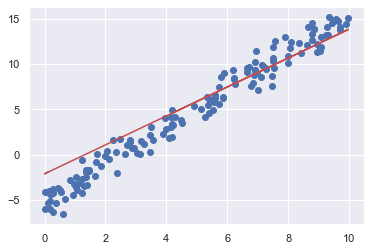

In [6]:
def run(lrate=0.001, n_iters=1000, b_init=0, m_init=0):
    b, m = gradient_descent(points, b_init, m_init, lrate, n_iters)
    y_hat = m * x + b
    plt.scatter(x, y)
    plt.plot(x, y_hat, color='r')

print('default settings: ')
run()

higher lrate:


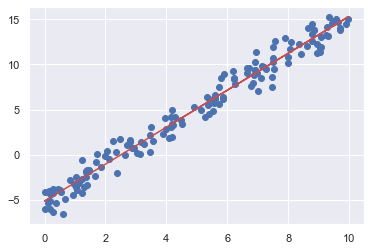

In [7]:
print('higher lrate:')
run(0.01)

Is there a way to figure out an optimal learning rate for this model?